<a href="https://colab.research.google.com/github/AlgorithmBurv/Prediction-CO2-Using-ARIMA/blob/main/Arima_CO2_3_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Model Time Series: Ringkasan dan Perbandingan

Model time series digunakan untuk memprediksi data masa depan berdasarkan data historis. Pemilihan model yang tepat bergantung pada sifat data (linier, non-linier, musiman), tujuan prediksi (jangka pendek atau panjang), dan kompleksitas model.

## Tabel Ringkasan Model Time Series

| Model               | Karakteristik                    | Kelebihan                         | Kekurangan                                      |
|--------------------|----------------------------------|------------------------------------|------------------------------------------------|
| ARIMA               | Linear, stasioner                 | Sederhana, efektif untuk data linier| Tidak cocok untuk data non-linier dan musiman    |
| SARIMA              | Linear, musiman                    | Tangani musiman dengan baik         | Parameter lebih banyak                          |
| VAR                 | Multivariat, linier                 | Menangani banyak variabel           | Kompleks jika data tidak stasioner               |
| LSTM                | Non-linear, long-term dependency   | Efektif untuk data non-linier       | Pelatihan lama dan overfitting                   |
| GRU                 | Non-linear, long-term dependency   | Lebih cepat dari LSTM               | Lebih sedikit memori dari LSTM                   |
| Prophet             | Non-linear, musiman                | Mudah digunakan, fleksibel          | Tidak cocok untuk data non-musiman                |
| GARCH               | Volatilitas, non-linear             | Efektif pada volatilitas            | Kompleks dan peka terhadap data outlier           |
| Holt-Winters         | Linear, musiman                    | Efektif pada tren musiman           | Tidak cocok untuk data non-linier                 |
| TBATS               | Musiman kompleks                    | Menangani musiman variabel           | Implementasi rumit                               |
| Hybrid (LSTM + ARIMA)| Gabungan linier dan non-linier     | Meningkatkan akurasi                | Butuh tuning lebih rumit                         |





# ARIMA: AutoRegressive Integrated Moving Average

ARIMA adalah metode peramalan deret waktu (time series) yang digunakan untuk memprediksi data masa depan berdasarkan data historis. Metode ini sangat berguna ketika data tidak stasioner dan memiliki tren naik atau turun.

## Apa Itu ARIMA?
ARIMA adalah singkatan dari:
- **AR (AutoRegressive)**: Melihat data dari masa lalu (lag) untuk memprediksi nilai saat ini.
- **I (Integrated)**: Menghilangkan tren agar data lebih stabil (stasioner).
- **MA (Moving Average)**: Mengurangi efek fluktuasi acak.

Secara umum, model ARIMA ditulis sebagai **ARIMA(p, d, q)**, di mana:
- **p** = Jumlah lag pada komponen AutoRegressive (AR)
- **d** = Derajat differencing untuk mencapai stasioneritas
- **q** = Jumlah lag pada komponen Moving Average (MA)

---

## Mengapa Menggunakan ARIMA?
ARIMA digunakan ketika:
1. Data berubah seiring waktu (misalnya, penjualan bulanan atau suhu harian).
2. Data tidak stasioner dan memiliki tren atau pola musiman.
3. Anda ingin memprediksi nilai masa depan dengan mempertimbangkan data masa lalu.

---

## Penjelasan Parameter (p, d, q)
### 1. AutoRegressive (p)
- Mengukur seberapa banyak data sebelumnya (lag) yang digunakan untuk memprediksi nilai saat ini.
- Misalnya, jika **p = 3**, berarti model melihat 3 periode sebelumnya untuk memprediksi periode sekarang.

### 2. Integrated (d)
- Menghilangkan tren dengan menghitung perbedaan data satu kali (d = 1) atau lebih (d = 2, dst.).
- Digunakan agar data menjadi lebih stabil (stasioner).

### 3. Moving Average (q)
- Mengurangi efek fluktuasi acak dengan melihat kesalahan pada lag sebelumnya.
- Misalnya, jika **q = 2**, maka kita melihat kesalahan dari 2 periode sebelumnya.

---

## Cara Kerja ARIMA
1. **Persiapan Data:**
   - Pastikan data berbentuk deret waktu.
   - Periksa apakah data stasioner dengan metode uji statistik (ADF Test).

2. **Pilih Parameter (p, d, q):**
   - Gunakan **Autocorrelation Plot** untuk mengetahui lag terbaik (p dan q).
   - Lakukan differencing (d) untuk membuat data stasioner.

3. **Buat Model ARIMA:**
   - Tentukan parameter (p, d, q) berdasarkan analisis sebelumnya.

4. **Prediksi Data Masa Depan:**
   - Gunakan model untuk melakukan prediksi dan evaluasi hasilnya.

---

## Autocorrelation Plot
Autocorrelation Plot digunakan untuk melihat korelasi data pada lag tertentu. Jika ada korelasi kuat pada lag 1-5, itu menunjukkan adanya pengaruh kuat dari data sebelumnya. Korelasi yang cepat turun ke nol menunjukkan data sudah stasioner.

---

## Kesimpulan
- ARIMA efektif untuk memprediksi data deret waktu yang tidak stasioner.
- Parameter (p, d, q) harus dipilih secara hati-hati berdasarkan analisis data.
- Gunakan Autocorrelation Plot untuk memahami pola lag dan tren.

Selamat mencoba model ARIMA! Jika ada pertanyaan lebih lanjut, jangan ragu untuk menghubungi.



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error



In [14]:
# Buat data time series sintetis (misalnya prediksi CO2 mobil)
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=50, freq='M')
co2_values = np.cumsum(np.random.randn(50)) + 100  # Data sintetis

<ipython-input-14-4541629fc344>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2020-01-01', periods=50, freq='M')


In [15]:
# Buat DataFrame
df = pd.DataFrame({'Date': dates, 'CO2': co2_values})
df.set_index('Date', inplace=True)
df.head()

,CO2
Date,
2020-01-31,100.496714
2020-02-29,100.358450
2020-03-31,101.006138
2020-04-30,102.529168
2020-05-31,102.295015


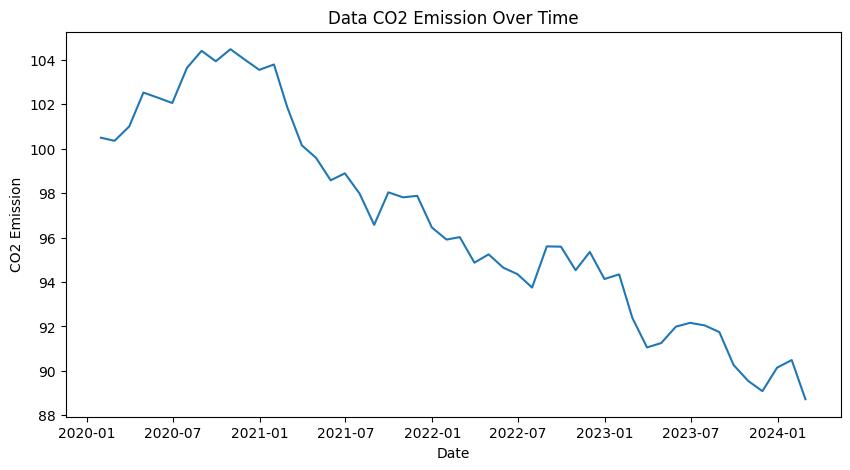

In [21]:
# Visualisasi Data
plt.figure(figsize=(10, 5))
plt.plot(df, label='CO2 Emission')
plt.title("Data CO2 Emission Over Time")
plt.xlabel("Date")
plt.ylabel("CO2 Emission")
plt.show()

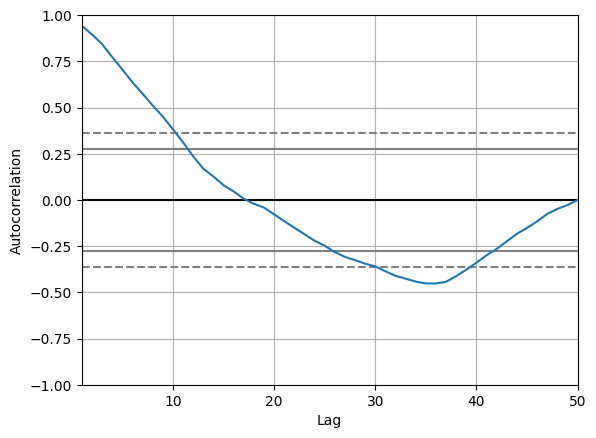

In [17]:
# Autocorrelation Plot
autocorrelation_plot(df)
plt.show()


In [18]:
# Buat Model ARIMA
model = ARIMA(df['CO2'], order=(5, 1, 0))  # p=5, d=1, q=0
arima_model = model.fit()

# Prediksi
predictions = arima_model.predict(start=len(df), end=len(df) + 11, typ='levels')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


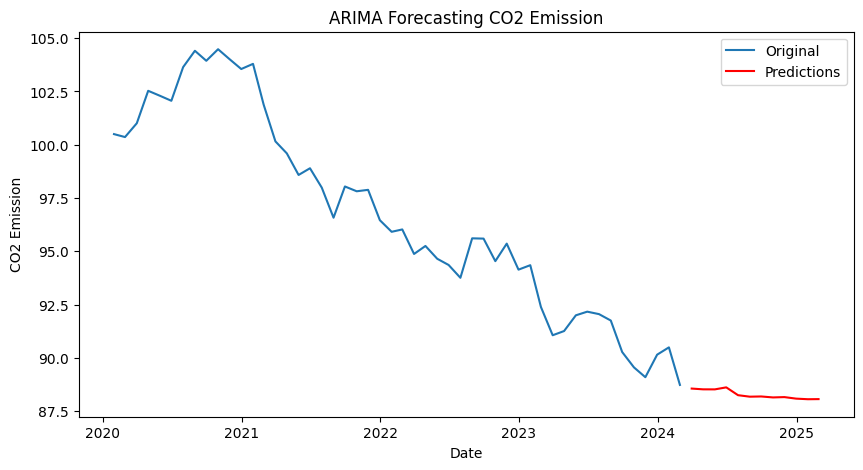

In [19]:
# Visualisasi Prediksi
plt.figure(figsize=(10, 5))
plt.plot(df, label='Original')
plt.plot(predictions, label='Predictions', color='red')
plt.title("ARIMA Forecasting CO2 Emission")
plt.xlabel("Date")
plt.ylabel("CO2 Emission")
plt.legend()
plt.show()

In [20]:
# Evaluasi Model
print("Model Summary:")
print(arima_model.summary())

Model Summary:
                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                   50
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -65.788
Date:                Sat, 22 Mar 2025   AIC                            143.576
Time:                        08:18:50   BIC                            154.926
Sample:                    01-31-2020   HQIC                           147.882
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0849      0.175      0.485      0.628      -0.258       0.428
ar.L2         -0.0329      0.176     -0.187      0.851      -0.377       0.311
ar.L3          0.1253      0.158     